 - ISE-291 PROJECT (PREDICTION / PRESCRIPTION OF OBESITY LEVELS)

In [2]:
# General notes and guidelines:
# i. You must prepare your report using a Jupyter Notebook and submit the report and your
# project's data (in CSV or XLS format).
# ii. The report's structure should be outlined so that each section addresses one of the
# above-mentioned deliverables. Your work will be assessed on both the quality of the
# content as well as the presentation of your material.
# It is crucial to support your analysis and choices by researching and citing your sources.
# State any assumptions you make during your analysis and justify them. The credibility
# of your analysis hinges on how thorough your research is.

In [1]:
group1_Id_Name={202183250 :'Mohamed Ashraf Mohamed Serag',
           202185410 :'Syed Abiullah Fareed',
           202185530 :'Abdulrahman Al-Sendi',
           202035760 :'Mohammed Alshammari',
           202165790 :'Alamri, Mohammed Abdullah'} 
sorted_keys = sorted(group1_Id_Name.keys())
for key in sorted_keys:
    print(key, group1_Id_Name[key])

202035760 Mohammed Alshammari
202165790 Alamri, Mohammed Abdullah
202183250 Mohamed Ashraf Mohamed Serag
202185410 Syed Abiullah Fareed
202185530 Abdulrahman Al-Sendi


# Discovery

In [4]:
# Guidlines: # will be deleted later.
# a. Select a field or topic of your interest. For example, an industrial engineering student
# is usually interested in supply chain applications. Find a relevant dataset that supports
# your topic of interest.,
# b. State clearly the problem and set the objective of the analysis.

## Problem

Obesity is a prevalent health concern affecting individuals worldwide, with its roots often linked to eating habits and physical condition. In the context of this project, we aim to apply machine learning techniques to accurately predict the obesity level of individuals based on a set of attributes related to their dietary habits and physical well-being. The dataset at hand contains comprehensive information (2111 observations) from individuals in Mexico, Peru, and Colombia, encompassing 17 attributes that potentially contribute to obesity levels. Successful application of this classification model holds the potential to contribute to the improvement of public health strategies, personalized healthcare recommendations, and a better understanding of the factors contributing to different obesity levels across diverse populations.


## Hypothesis:
Our underlying hypothesis is that the input features can be used to predict the obesity levels.

## Objectives: 
1. **Analyze Feature Relationships:** Investigate interactions among features to uncover patterns.

2. **Link Inputs and Obesity Level:** Establish connections between inputs and obesity prediction.

3. **Predict Obesity Level:** Apply an appropriate ML model for accurate obesity level predictions.

4. **Enhance New Person Prediction:** Improve model's capability to predict new individuals' obesity levels.

**Description Of Features**
| Feature                       | Description                                                                                     |
|-------------------------------|-------------------------------------------------------------------------------------------------|
| Gender                        | Gender of the individual (e.g., Male or Female)                                                |
| Age                           | Age of the individual in years                                                                 |
| Height                        | Height of the individual in centimeters                                                        |
| Weight                        | Weight of the individual in kilograms                                                          |
| Family_history                | Whether the individual has a family history of overweight (Yes or No)                           |
| FAVC                          | Frequency of consuming high-calorie food (e.g., Never, Sometimes, Always)                       |
| FCVC                          | Frequency of consuming vegetables (e.g., Never, Sometimes, Always)                              |
| NCP                           | Number of main meals per day                                                                   |
| CAEC                          | Consumption of food between meals (e.g., No, Sometimes, Frequently, Always)                     |
| SMOKE                         | Smoking status of the individual (Yes or No)                                                   |
| CH2O                          | Consumption of water daily (in liters)                                                         |
| SCC                           | Self-reported caloric consumption (Yes or No)                                                  |
| FAF                           | Physical activity frequency per week                                                           |
| TUE                           | Time spent sitting or lying down (hours/day)                                                   |
| CALC                          | Consumption of alcohol (e.g., No, Sometimes, Frequently, Always)                                |
| MTRANS                        | Mode of transportation (e.g., Car, Bike, Public_Transportation)                                 |
| NObeyesdad                    | Obesity class  |


# Data Preparation 

In [5]:
# a. Read the selected data, list the fields/variables, and identify their types.
# b. List the inconsistencies, missing data, and outliers. Fix the inconsistencies, impute the
# missing data, and remove the outliers.
# Note: If your data does not have inconsistencies, missing observations, or outliers, it is
# suggested to create them manually and apply methods to show your skills

In [2]:
import pandas as pd 
import numpy as np

df = pd.read_csv('Obesity_dataset.csv',delimiter=',')
display(df.head()) # Displaying top 5 rows
display(df.sample(5)) # Random 5

FileNotFoundError: [Errno 2] No such file or directory: 'Obesity_dataset.csv'

In [2]:
# Searching for inconsistensy 
print('My unique values in every column:')
print('-'*30)
cat_columns= df.select_dtypes(include='object').columns
num_columns= df.select_dtypes(exclude='object').columns
for column in cat_columns:
    print(column+':')
    print(df[column].unique())
print('-'*100)

# resolving inconsistency
df[cat_columns] = df[cat_columns].applymap(lambda x: str(x.replace('yes','Yes')))
df[cat_columns] = df[cat_columns].applymap(lambda x: str(x.replace('no','No')))
df["NObeyesdad"]=df["NObeyesdad"].apply(lambda x: str(x.replace("Overweight_Level_II","Overweight Level 2")))
df["NObeyesdad"]=df["NObeyesdad"].apply(lambda x: str(x.replace("Overweight_Level_I","Overweight Level 1")))
df["NObeyesdad"]=df["NObeyesdad"].apply(lambda x: str(x.replace("Obesity_Type_III","Obesity Level 3")))
df["NObeyesdad"]=df["NObeyesdad"].apply(lambda x: str(x.replace("Obesity_Type_II","Obesity Level 2")))
df["NObeyesdad"]=df["NObeyesdad"].apply(lambda x: str(x.replace("Obesity_Type_I","Obesity Level 1")))
df[cat_columns] = df[cat_columns].applymap(lambda x: str(x.replace('_',' ')))
df["CAEC"]=df["CAEC"].apply(lambda x: str(x.replace('No','Never')))
df["CALC"]=df["CALC"].apply(lambda x: str(x.replace('No','Never')))

#Display the Data After Resolving
display(df.head())
display(df.sample(5))

My unique values in every column:
------------------------------
Gender:
['Female' 'Male']
family_history_with_overweight:
['yes' 'no']
FAVC:
['no' 'yes']
CAEC:
['Sometimes' 'Frequently' 'Always' 'no']
SMOKE:
['no' 'yes']
SCC:
['no' 'yes']
CALC:
['no' 'Sometimes' 'Frequently' 'Always']
MTRANS:
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad:
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
----------------------------------------------------------------------------------------------------


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,Yes,No,2.0,3.0,Sometimes,No,2.0,No,0.0,1.0,Never,Public Transportation,Normal Weight
1,Female,21.0,1.52,56.0,Yes,No,3.0,3.0,Sometimes,Yes,3.0,Yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,1.80,77.0,Yes,No,2.0,3.0,Sometimes,No,2.0,No,2.0,1.0,Frequently,Public Transportation,Normal Weight
3,Male,27.0,1.80,87.0,No,No,3.0,3.0,Sometimes,No,2.0,No,2.0,0.0,Frequently,Walking,Overweight Level 1
4,Male,22.0,1.78,89.8,No,No,2.0,1.0,Sometimes,No,2.0,No,0.0,0.0,Sometimes,Public Transportation,Overweight Level 2


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1369,Female,18.078256,1.622999,82.403076,Yes,Yes,2.340405,3.000000,Sometimes,No,1.655245,No,1.006884,0.548539,Never,Public Transportation,Obesity Level 1
800,Female,18.000000,1.644682,68.392133,Yes,Yes,2.000000,1.131695,Sometimes,No,1.344539,No,0.000000,1.592570,Never,Public Transportation,Overweight Level 1
1571,Male,37.056193,1.750150,118.206565,Yes,Yes,2.092830,3.000000,Sometimes,No,2.077704,No,0.598655,0.000000,Sometimes,Automobile,Obesity Level 2
488,Male,21.000000,1.880000,84.000000,Yes,Yes,3.000000,3.000000,Sometimes,No,3.000000,No,2.000000,1.000000,Sometimes,Walking,Normal Weight
36,Female,22.000000,1.560000,49.000000,No,Yes,2.000000,3.000000,Sometimes,No,1.000000,Yes,2.000000,0.000000,Never,Walking,Normal Weight


In [3]:
# Displaying the datatype of features in python.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# Model Planning

In [9]:
# a. Run the exploratory data analysis:
# i. Find the statistical summaries.
# ii. Make univariate graphs (i.e., graphs based on single variable).
# iii. Prepare bivariate plots (i.e., plots based on two variables).
# iv. Portray advanced graphs (i.e., graphs based on more than two variables).
# v. Assess the relationship between variables.
# b. Summarise your findings.
# In this course, we cover three model types: regression models, classification models, and
# clustering. Choose the suitable modeling technique for the successful achievement of your
# objectives and provide the justification

In [4]:
# Statistical Summaries
display(df.describe(include='object').T)
display(df.describe(exclude='object').T)

,count,unique,top,freq
Gender,2111,2,Male,1068
family_history_with_overweight,2111,2,Yes,1726
FAVC,2111,2,Yes,1866
CAEC,2111,4,Sometimes,1765
SMOKE,2111,2,No,2067
SCC,2111,2,No,2015
CALC,2111,4,Sometimes,1401
MTRANS,2111,5,Public Transportation,1580
NObeyesdad,2111,7,Obesity Level 1,351


,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


The count plots for the categorical columns:
____________________________________________________________________________________________________


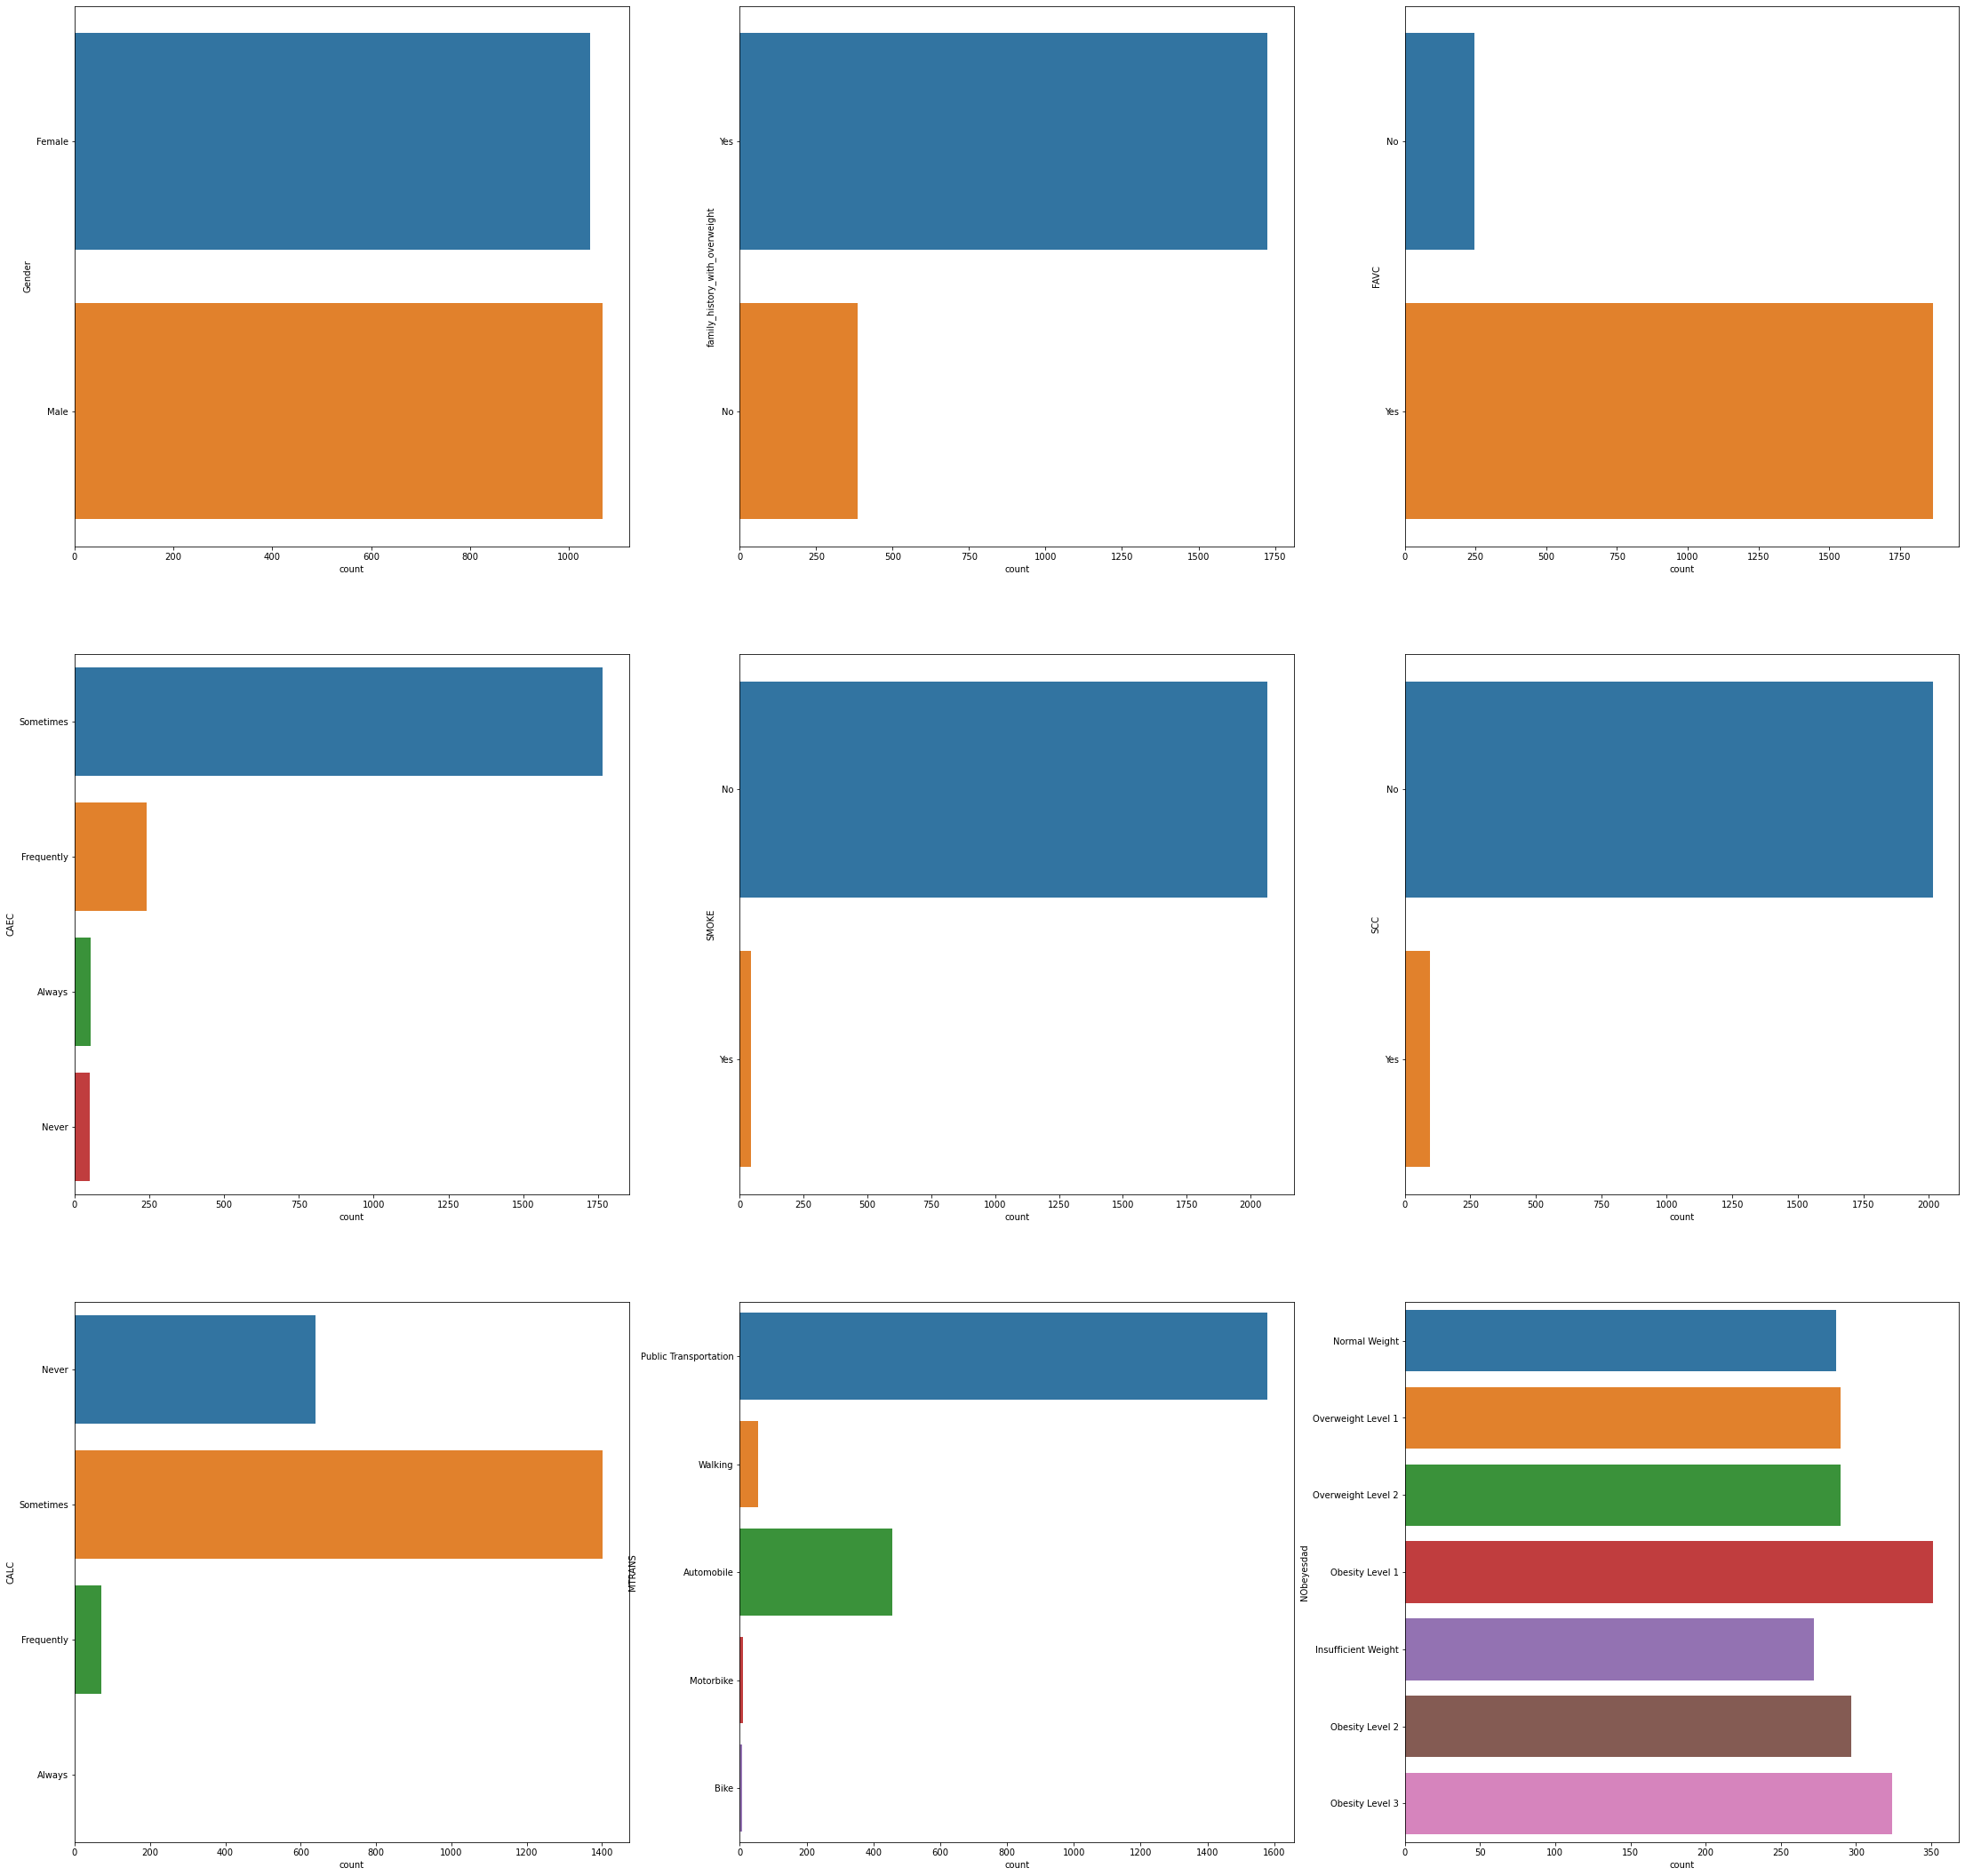

In [26]:
#Displaying Univariate Graphs

#For categorical data :

print('The count plots for the categorical columns:')
print('_'*100)
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

nCols=3   # The number of columns that you want
nRows=3   # The number of corresponding rows 

## to avoid rotating labels:
fig,axes = plt.subplots(nRows, nCols, figsize=(38,38))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=df,ax=axes.flatten()[ind])
plt.show()


The histogram plots for the numerical columns:
____________________________________________________________________________________________________


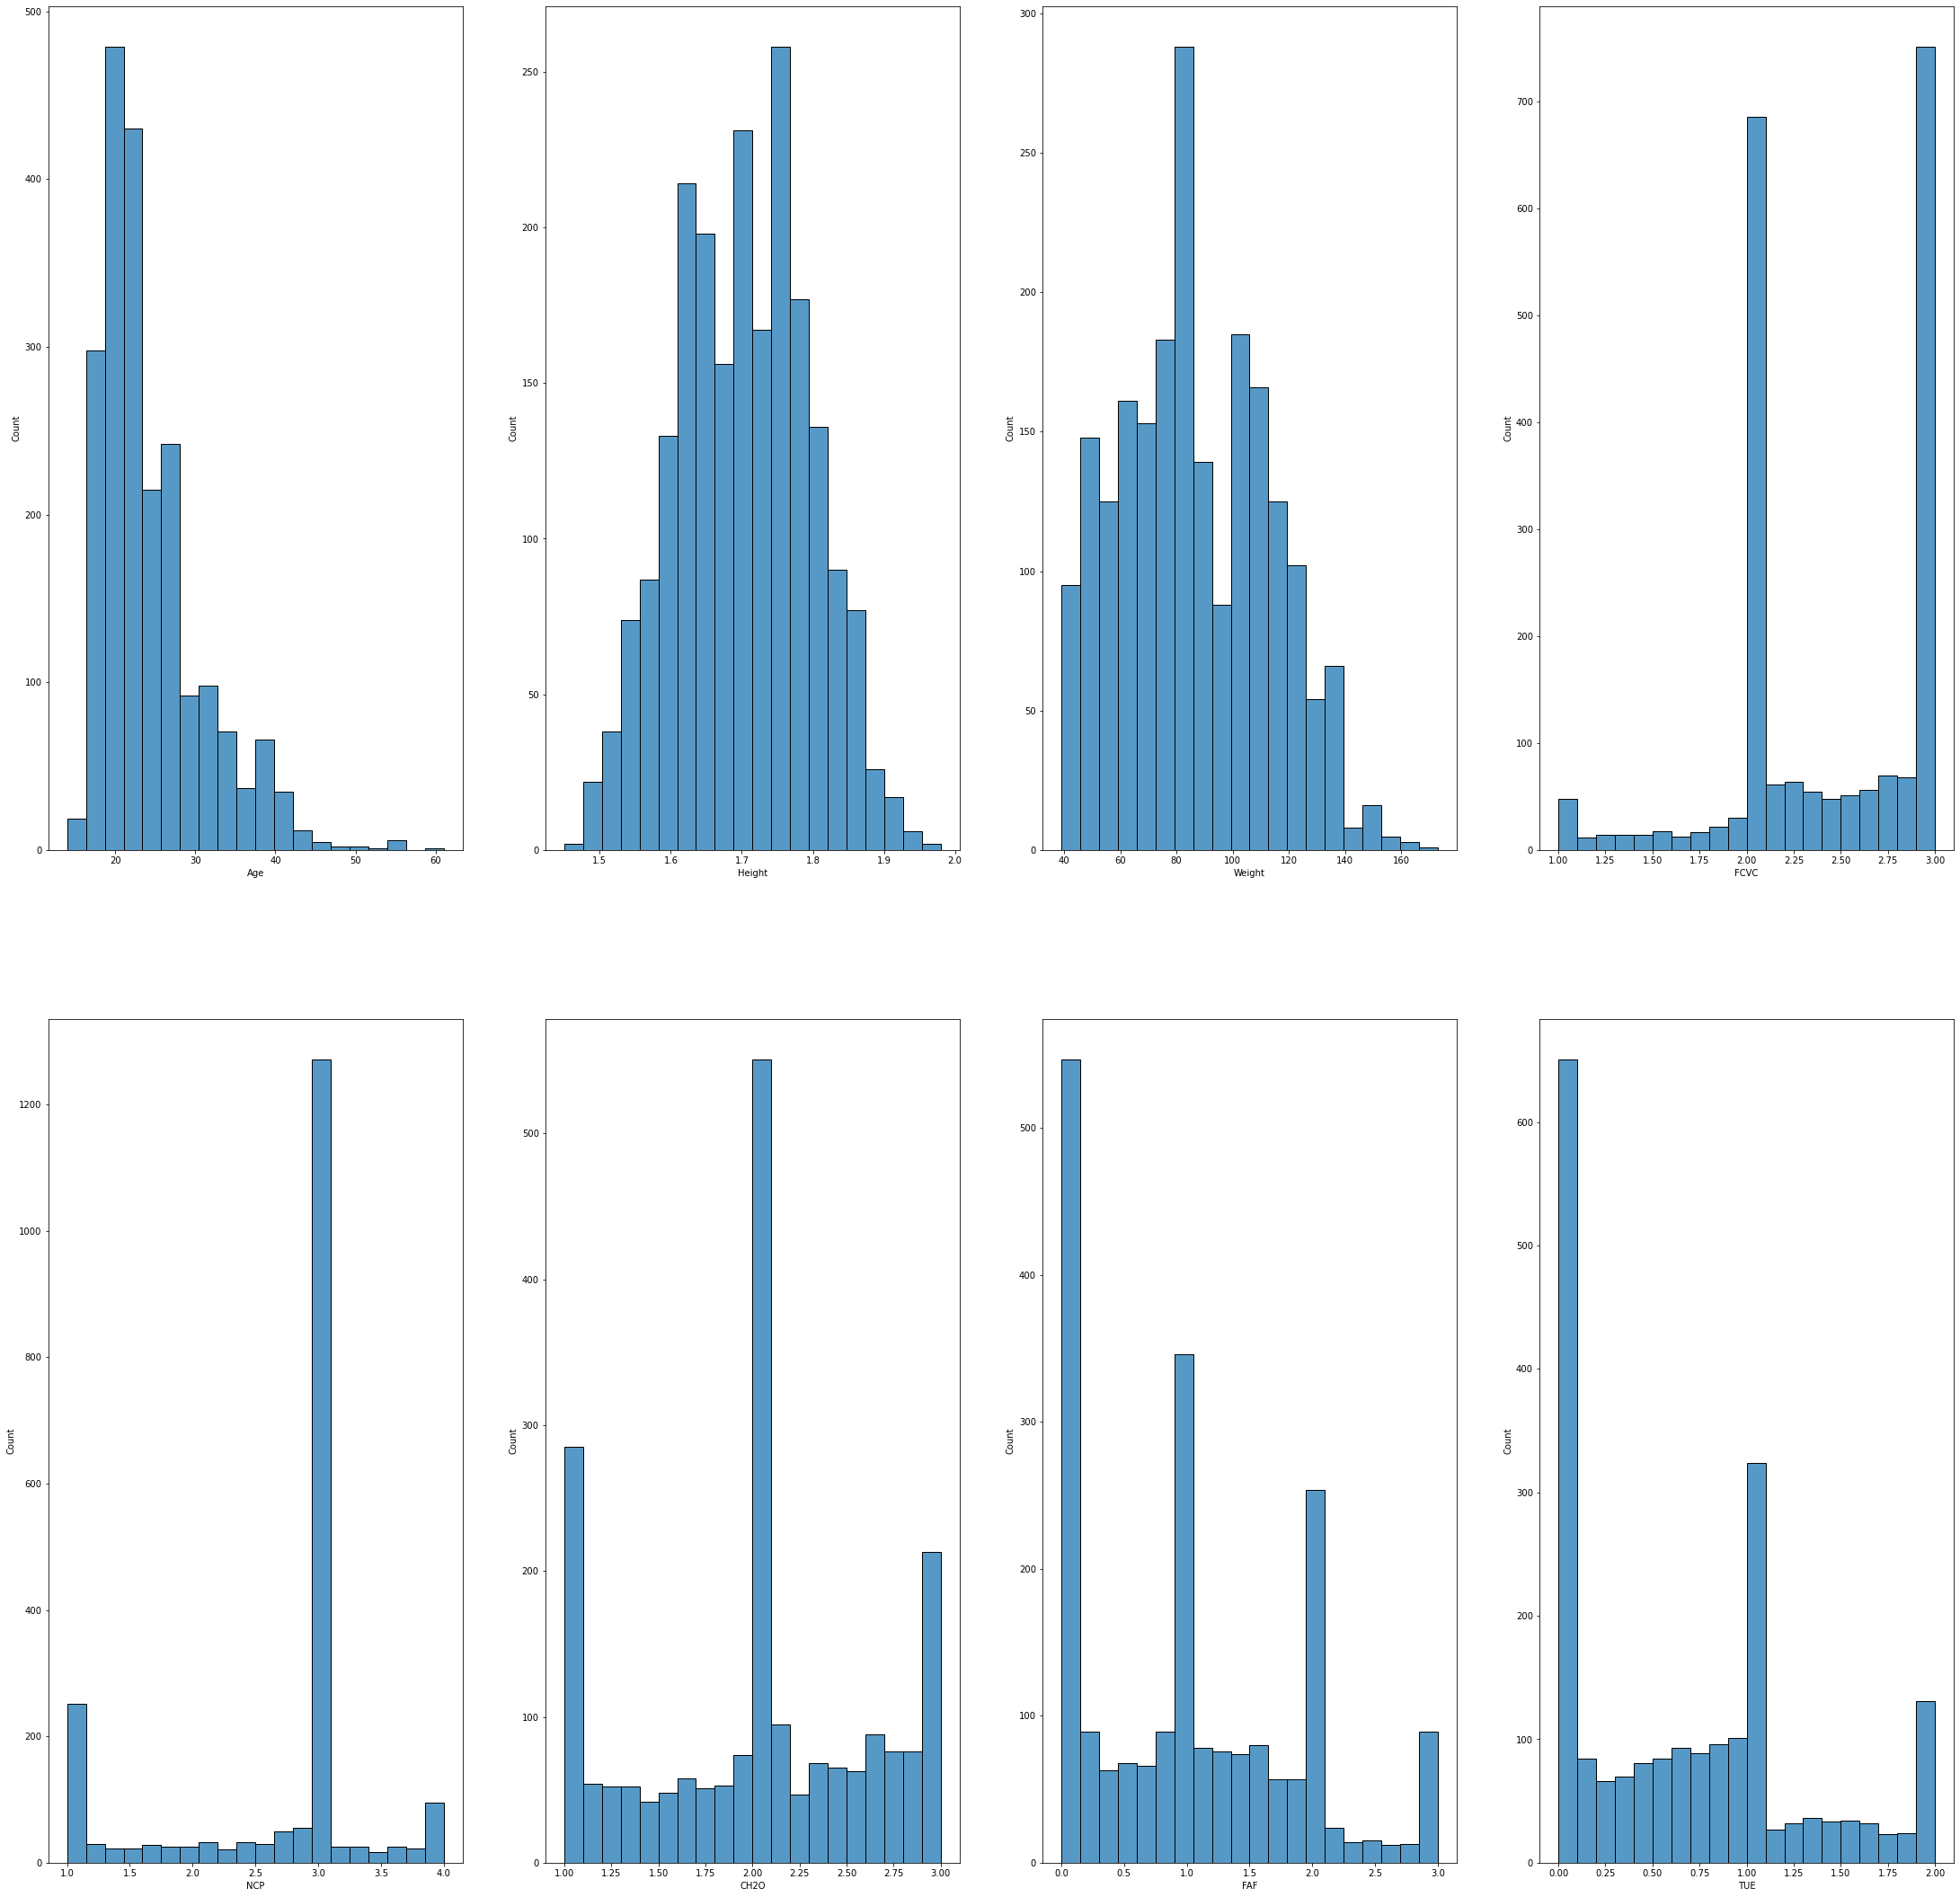

In [51]:
# For numerical data :

nRows=2 # number of rows
nCols=4 # number of columns

print('The histogram plots for the numerical columns:')
print('_'*100)
fig,axes = plt.subplots(nRows, nCols, figsize=(38,38))
for ind,col in enumerate(num_columns):
    sns.histplot(x=col,bins=20,data=df,ax=axes.flatten()[ind]) # Used 20 bins for more accuracy.
plt.show()

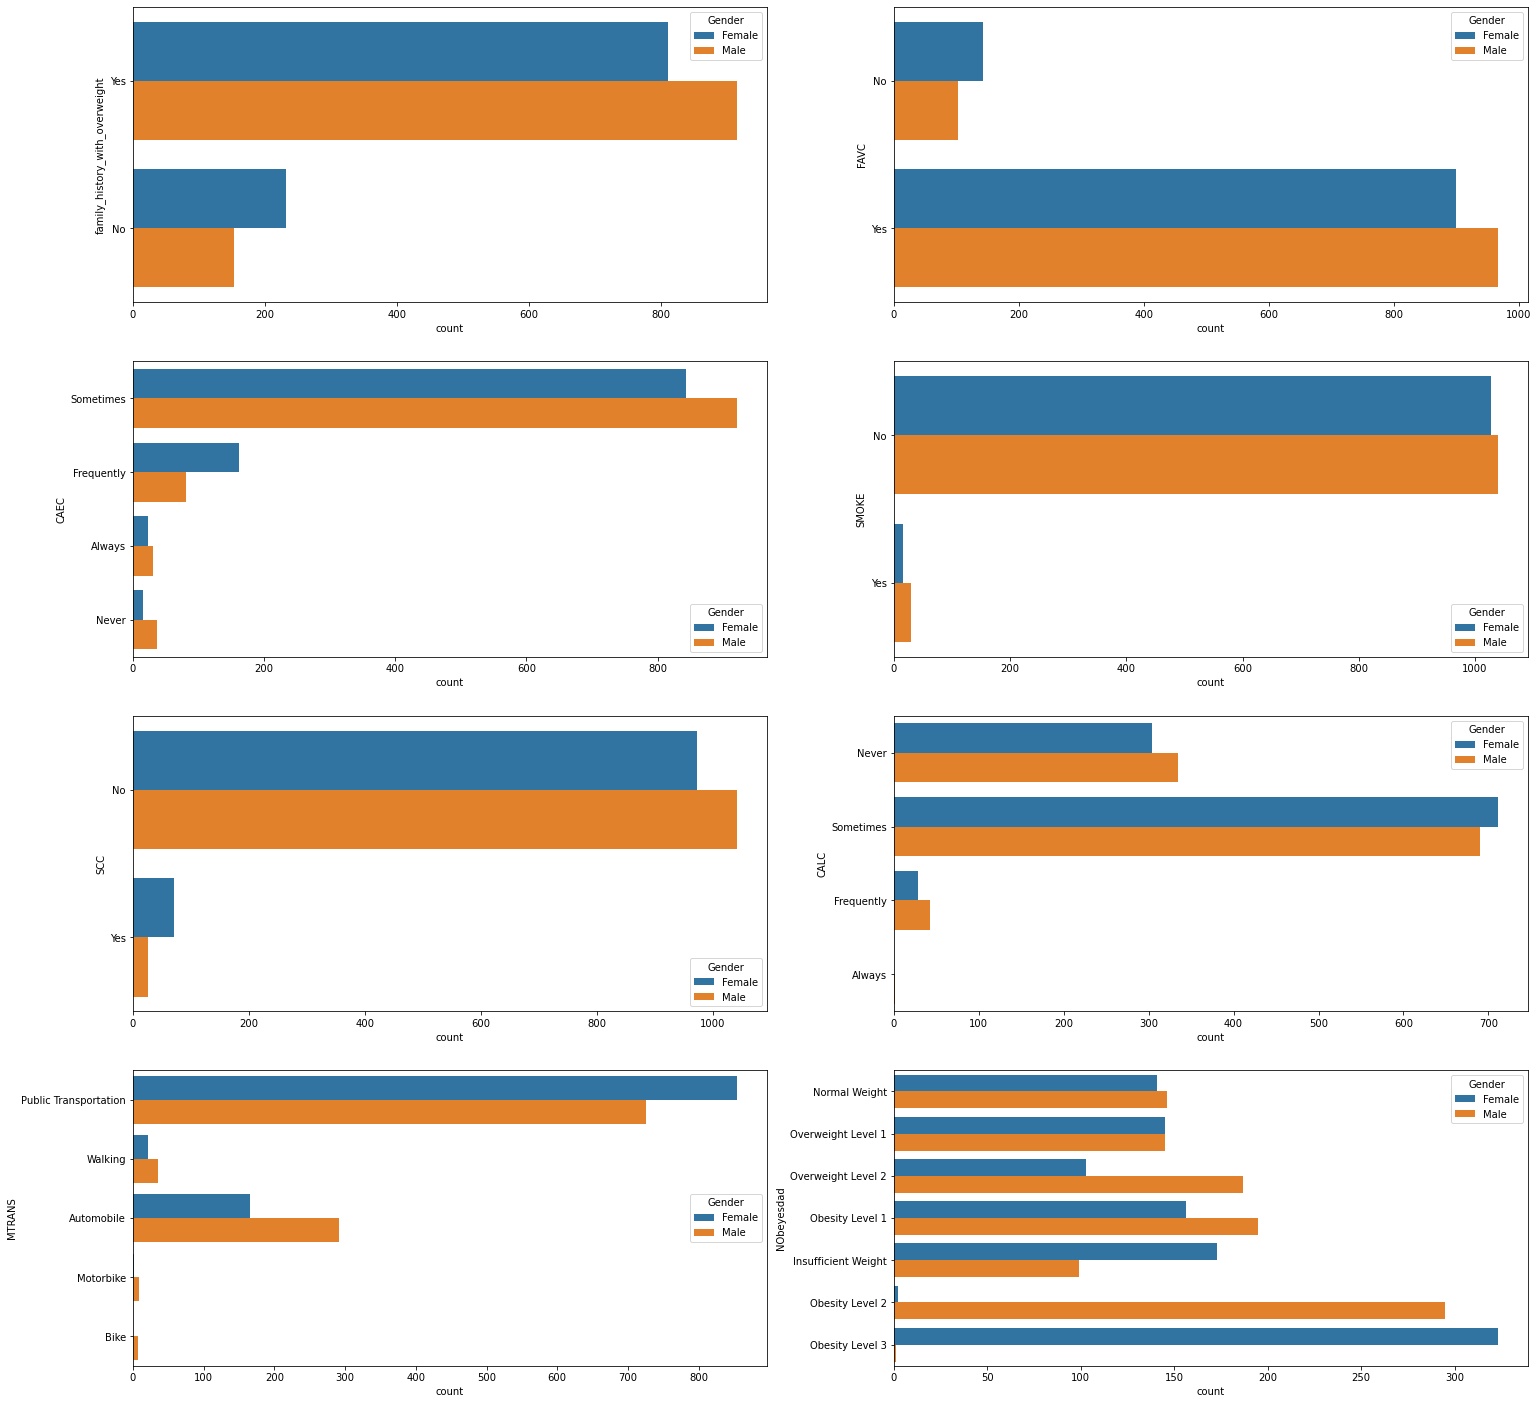

In [53]:
#Displaying Bivariate Graphs

# Differentiating the categorical data by Gender :

nRows=4
nCols=2

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns.drop(['Gender'])):
    sns.countplot(y=col,hue='Gender',data=df,ax=axes.flatten()[ind])
plt.show()

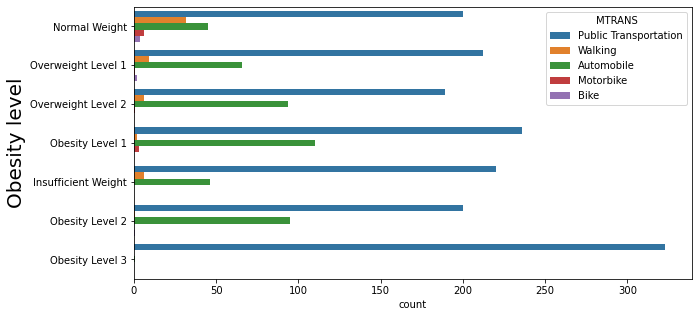

In [45]:
# Plotting Modes of Transportation against Obesity levels :

plt.figure(figsize=(10,5))
sns.countplot(y='NObeyesdad',hue='MTRANS',data=df)
plt.ylabel('Obesity level', fontsize = 20)
plt.show()

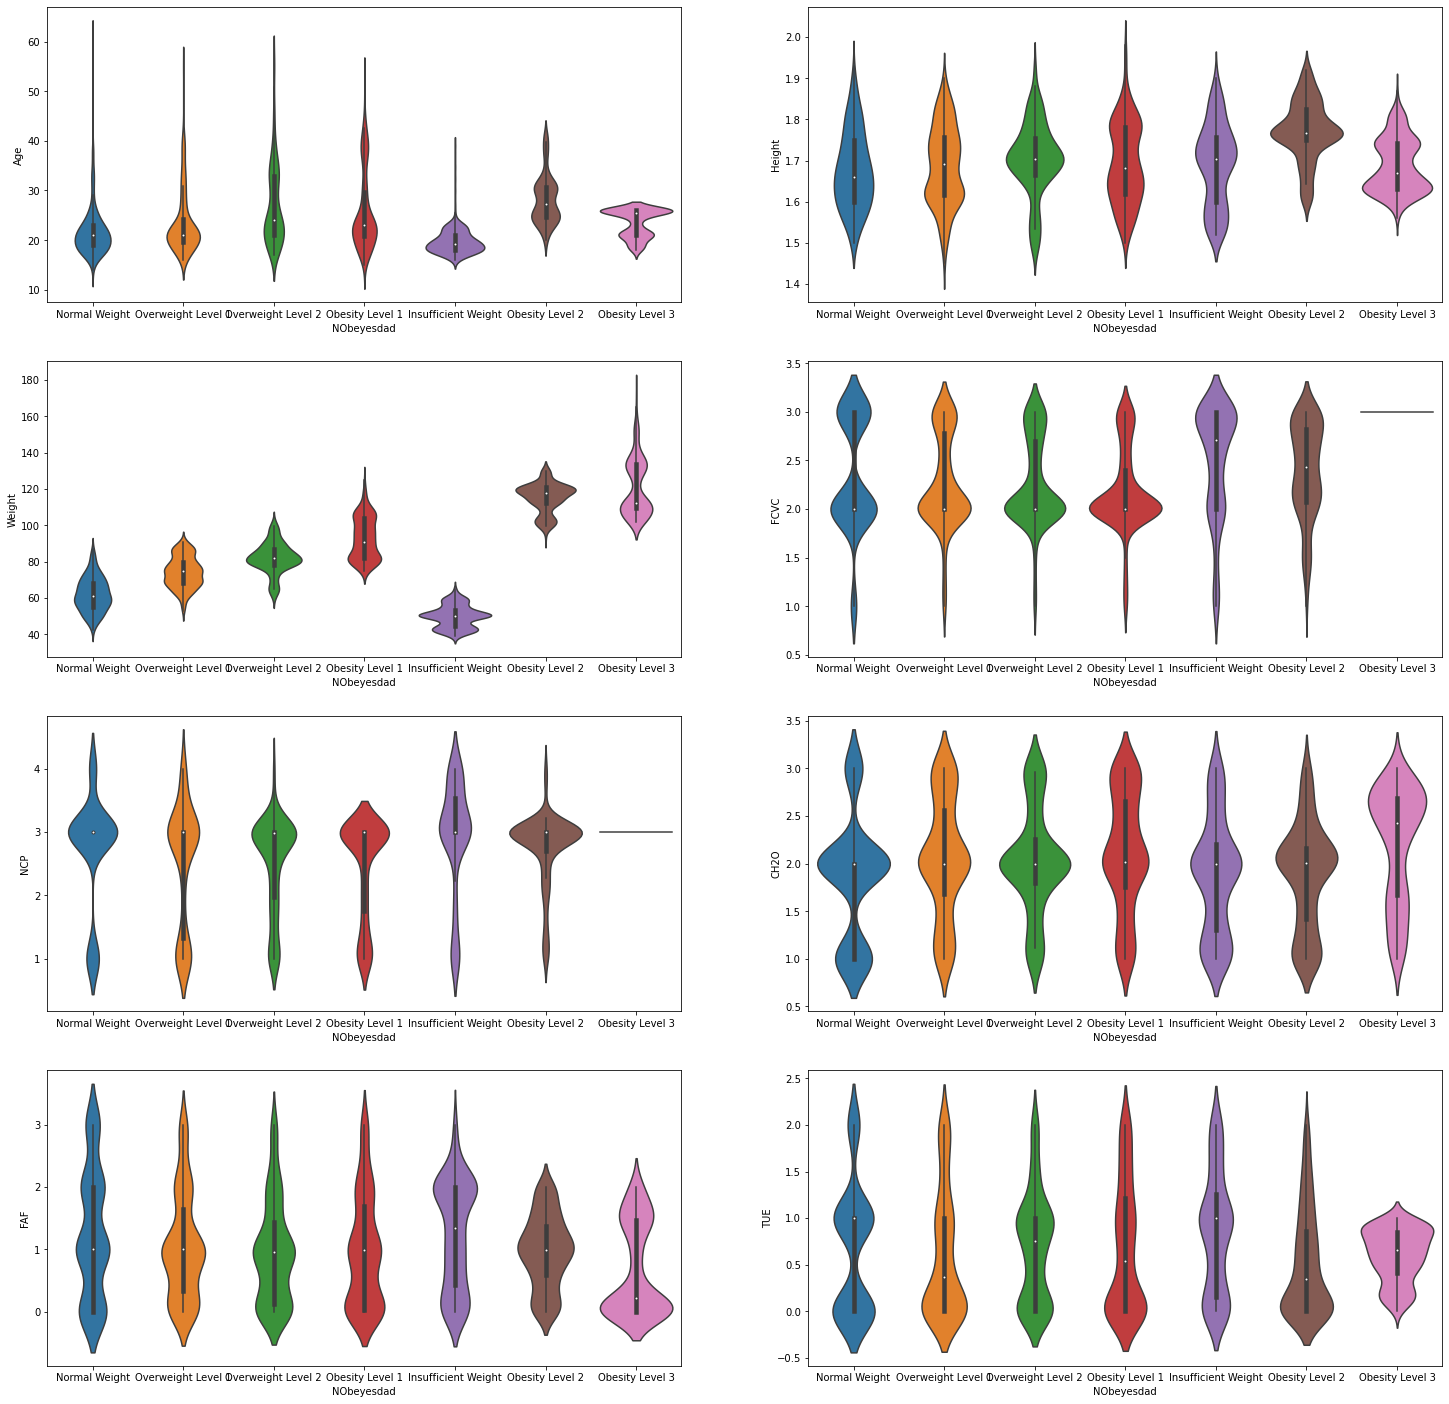

In [76]:
# Visualizing the spread of numerical variables by Obesity level :

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(num_columns):
    sns.violinplot(y=col,x='NObeyesdad',data=df,ax=axes.flatten()[ind]) 
plt.show()

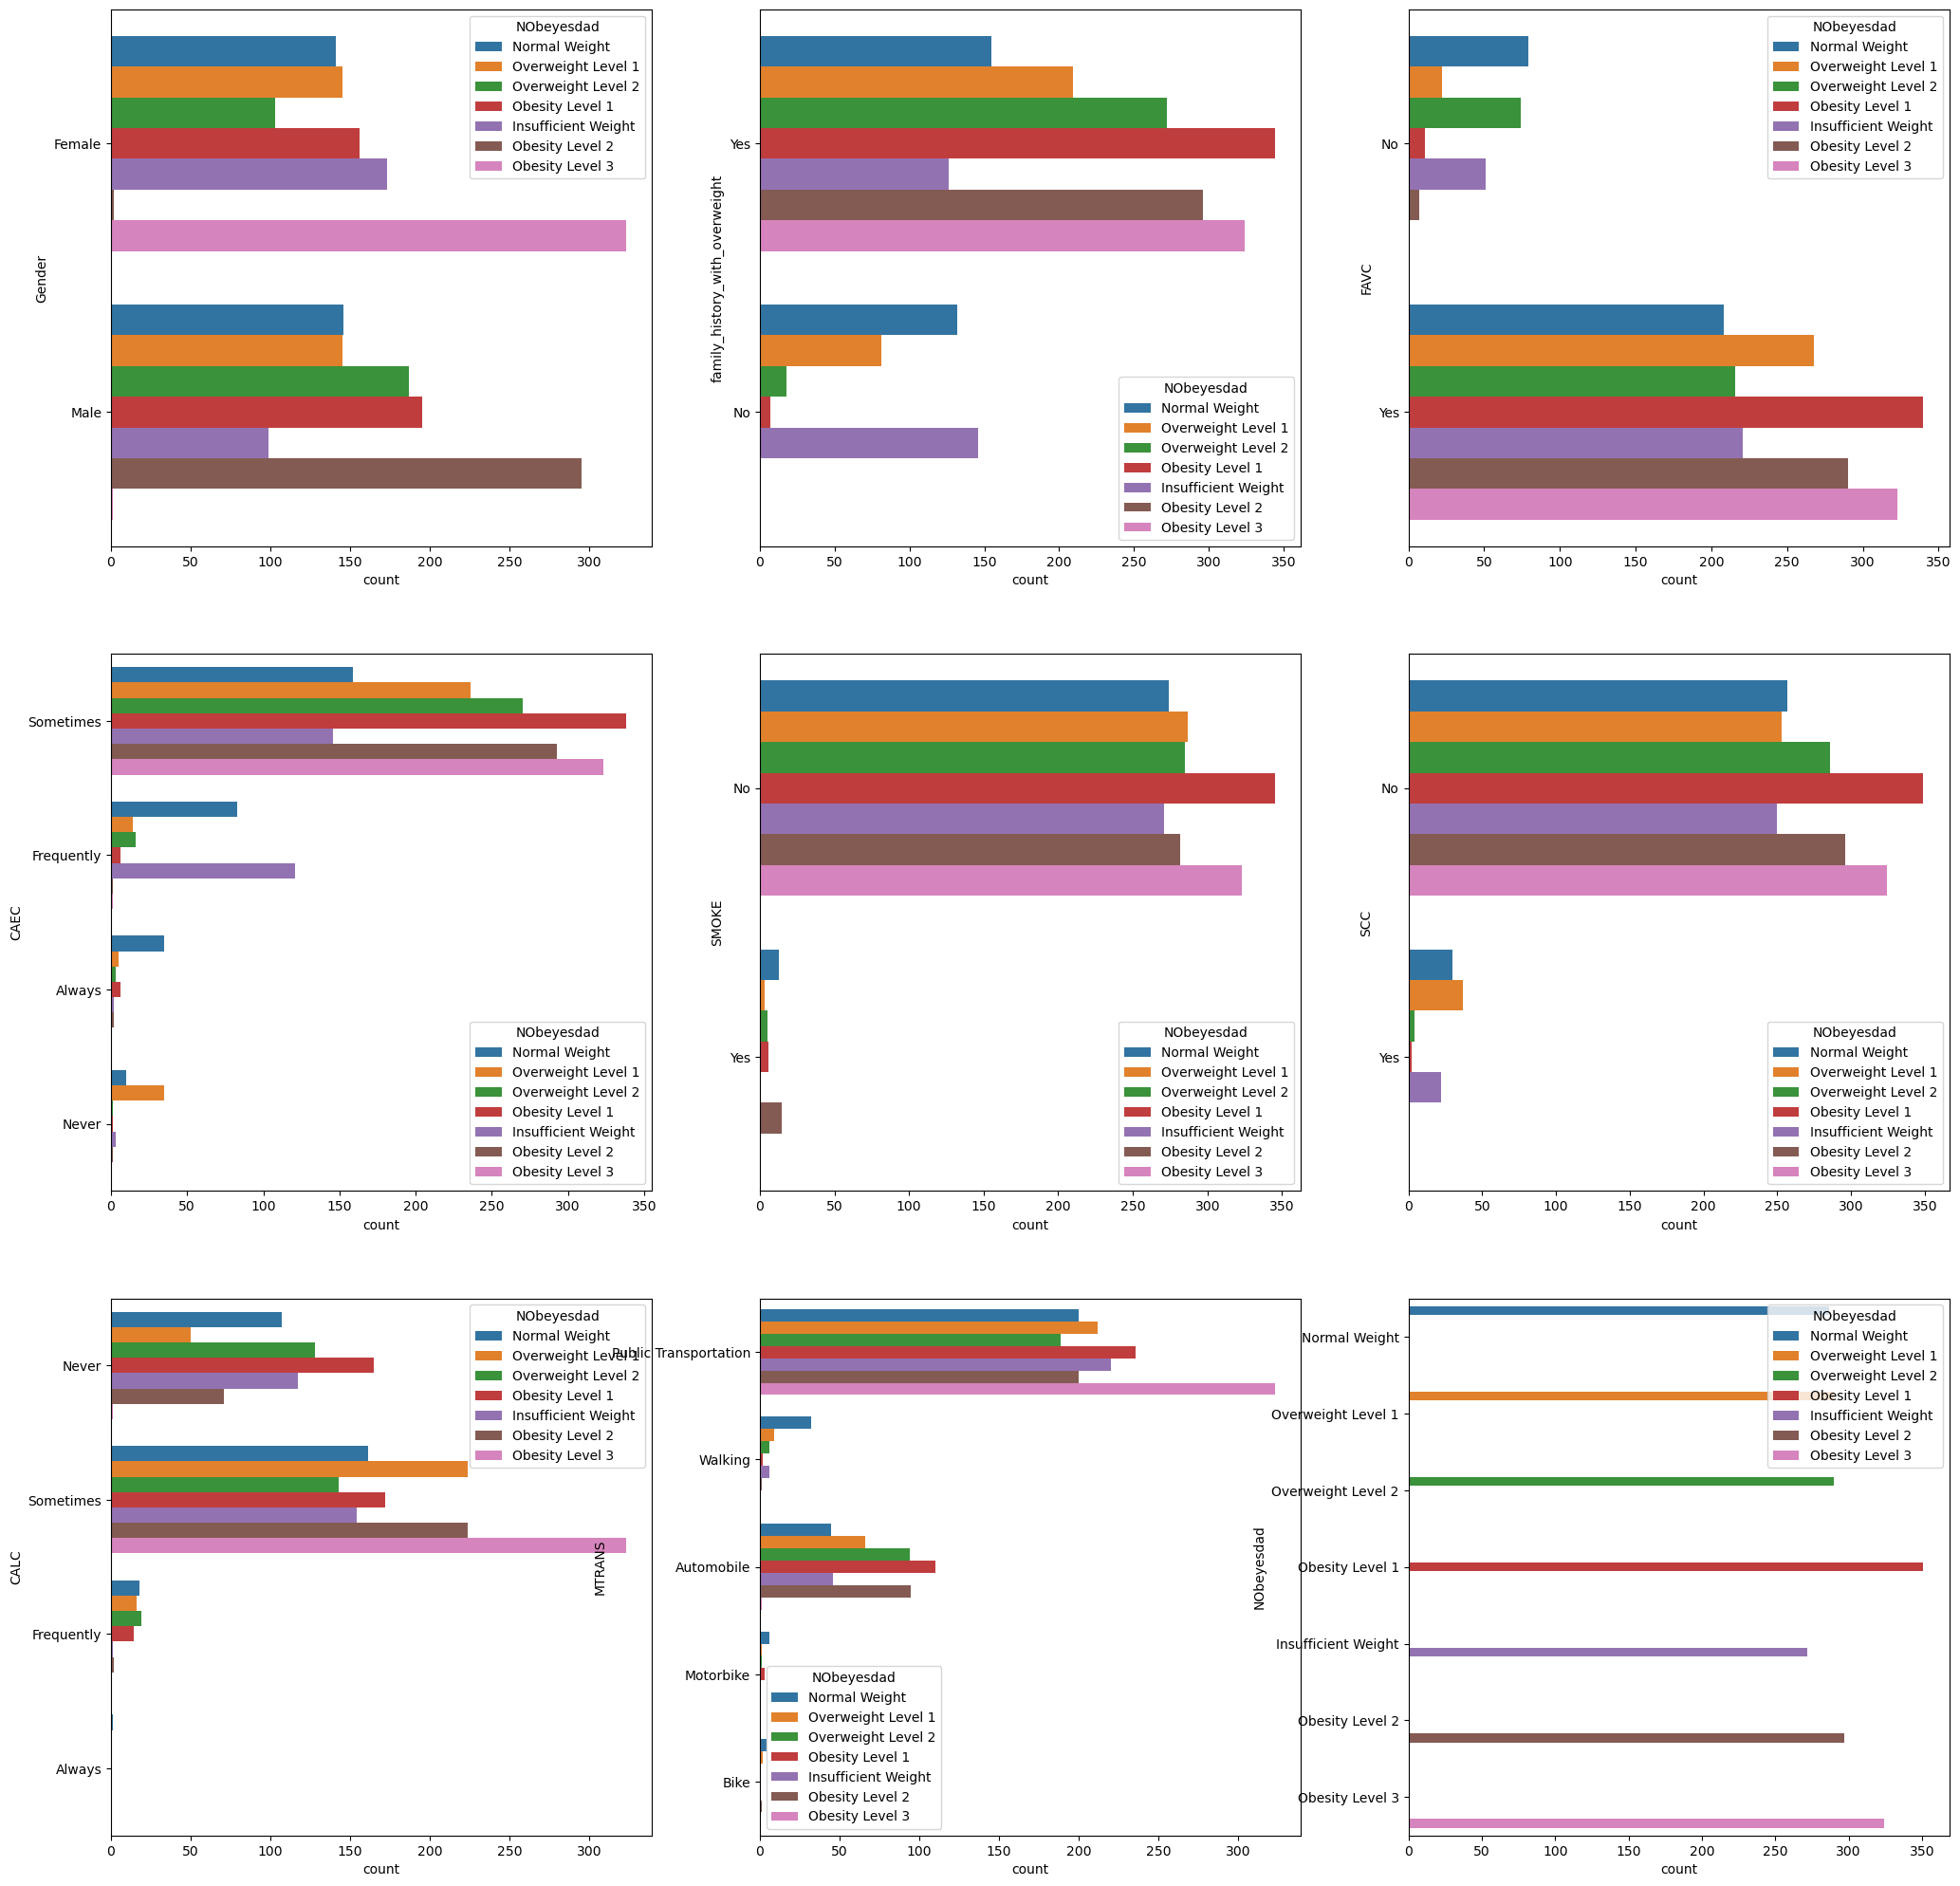

In [17]:
#Display Advanced Graphs

nCols=3   # The number of columns that you want
nRows=len(cat_columns)//nCols   # The number of correspomding rows 

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,hue='NObeyesdad',data=df,ax=axes.flatten()[ind])
plt.show()

<Figure size 640x480 with 0 Axes>

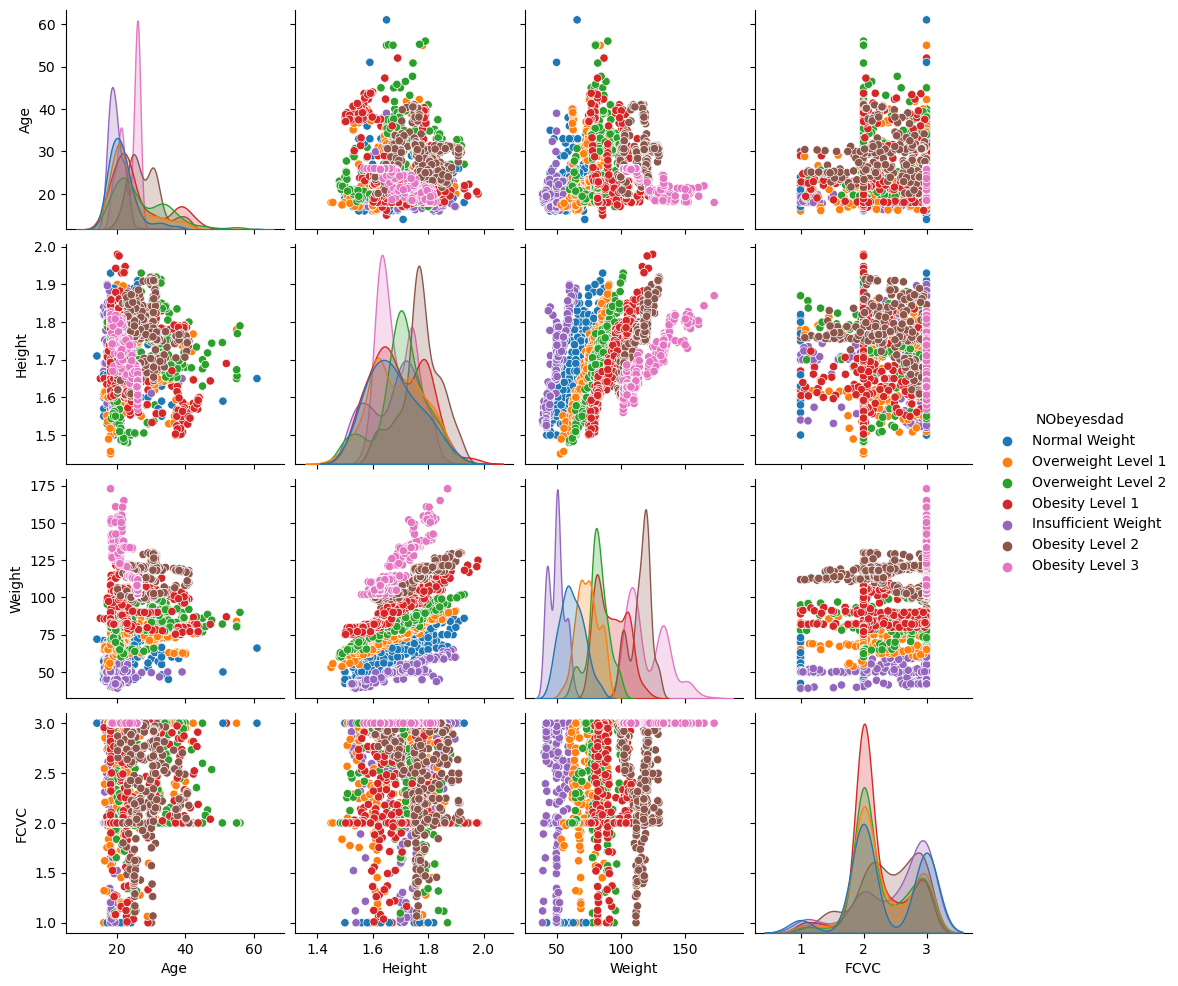

In [18]:
num_columns = df.describe(exclude='object').columns
plt.figure()  
sns.pairplot(vars=num_columns[0:4],hue ='NObeyesdad',data=df)  
plt.show()

<Figure size 640x480 with 0 Axes>

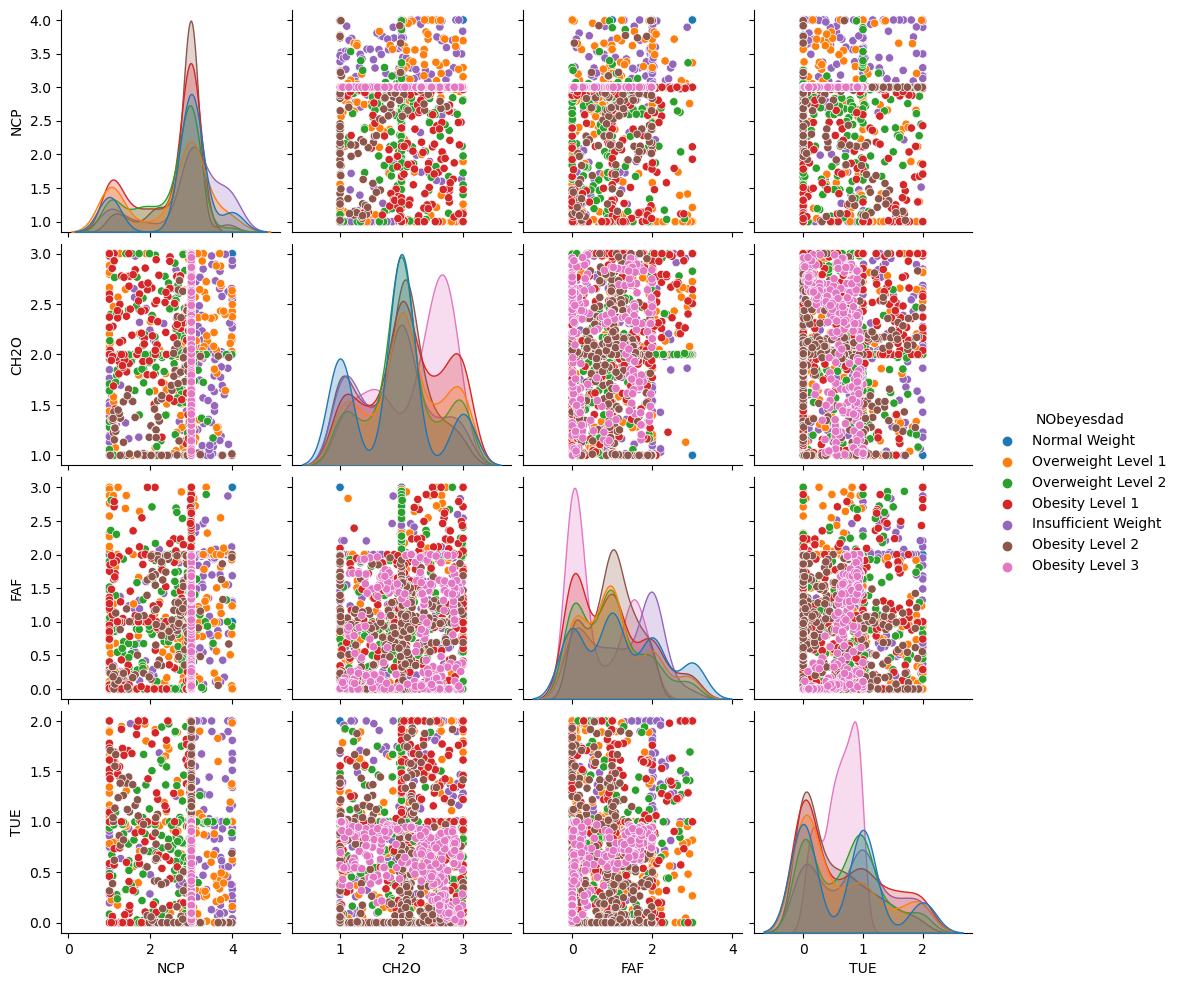

In [19]:
plt.figure()
sns.pairplot(vars=num_columns[4:8],hue ='NObeyesdad',data=df)  
plt.show()

# Model Building

In [ ]:
# a. Estimate the unknown model parameters (fitting) and evaluate the model
# (validation/cross-validation).
# b. Compare different models based on the performance measures.
# c. Interpret the findings and provide the details of the final selected model.

# Operationalize 

In [ ]:
# a. Provide the general guidelines to adopt your methodology.
# b. List the problems and issues in the implementation of the selected methodology.

# Communicate results 

In [ ]:
# a. Provide the summary and conclusion of your analysis.
# b. Give possible future recommendations.

# References:

- Dataset: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition